# Multi-scale data


To illustrate using Matplotlib to explore multi-scale data we will work with temperature time series.

From NOAA we can look at the INTEGRATED SURFACE DATA data set (https://www.ncdc.noaa.gov/isd) which contains historical weather data from weather stations across the world.  Look at just the temperature aspect of this record we have a data set that has cyclic variations at 24 hours (day/night), random variation on the day-to-day, cyclic variaton at the year scale, and we can get time series on the decade scale.

## Some imports

The code to do the data processing required for this demo and the implementation are store in a .py file in this directory. 

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

from temperature_utils import *

## Load the data

We have some pre-downloaded data for Ithaca and Central park in this repo.  Data from additional weather stations can be downlodad using the code in `99-get_data.py`.

In [2]:
d = load_data('ithaca')
d

,year,month,day,hour,T
datetime,,,,,
2006-01-01 00:00:00,2006,1,1,0,-1.0
2006-01-01 00:56:00,2006,1,1,0,0.0
2006-01-01 01:56:00,2006,1,1,1,-0.5
2006-01-01 02:56:00,2006,1,1,2,-0.5
2006-01-01 03:12:00,2006,1,1,3,-1.0
...,...,...,...,...,...
2021-03-07 01:56:00,2021,3,7,1,-5.0
2021-03-07 02:56:00,2021,3,7,2,-5.0
2021-03-07 03:56:00,2021,3,7,3,-5.6


Looking at the repr of the data frame we can can see we have just over 15 years worth of data.

We can of course plot this directly from pandas via

In [3]:
d.plot(y='T')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='datetime'>

In [4]:
plt.figure(1).gca().get_xlim()

(12871.787638888889, 18970.45958333333)

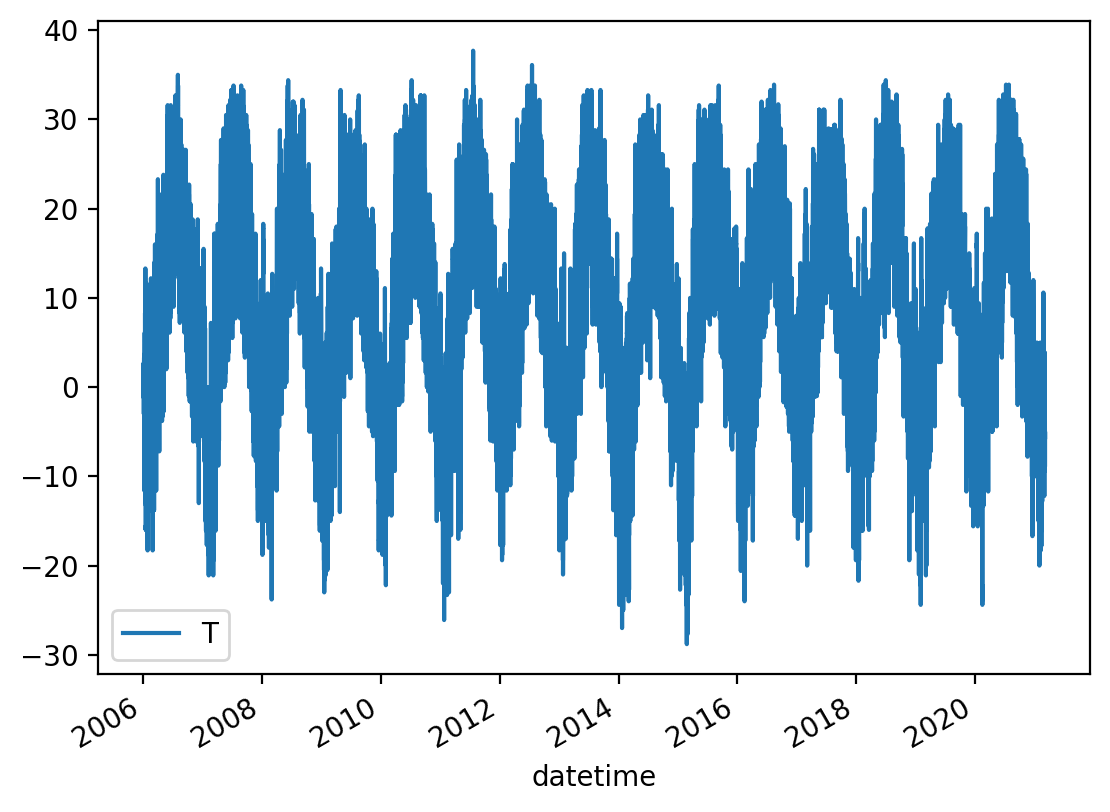

In [5]:
# snap shot for static version
plt.gcf()

which clearly shows the yearly cycle.  On the other hand if we zoom in we can see the daily-cycle

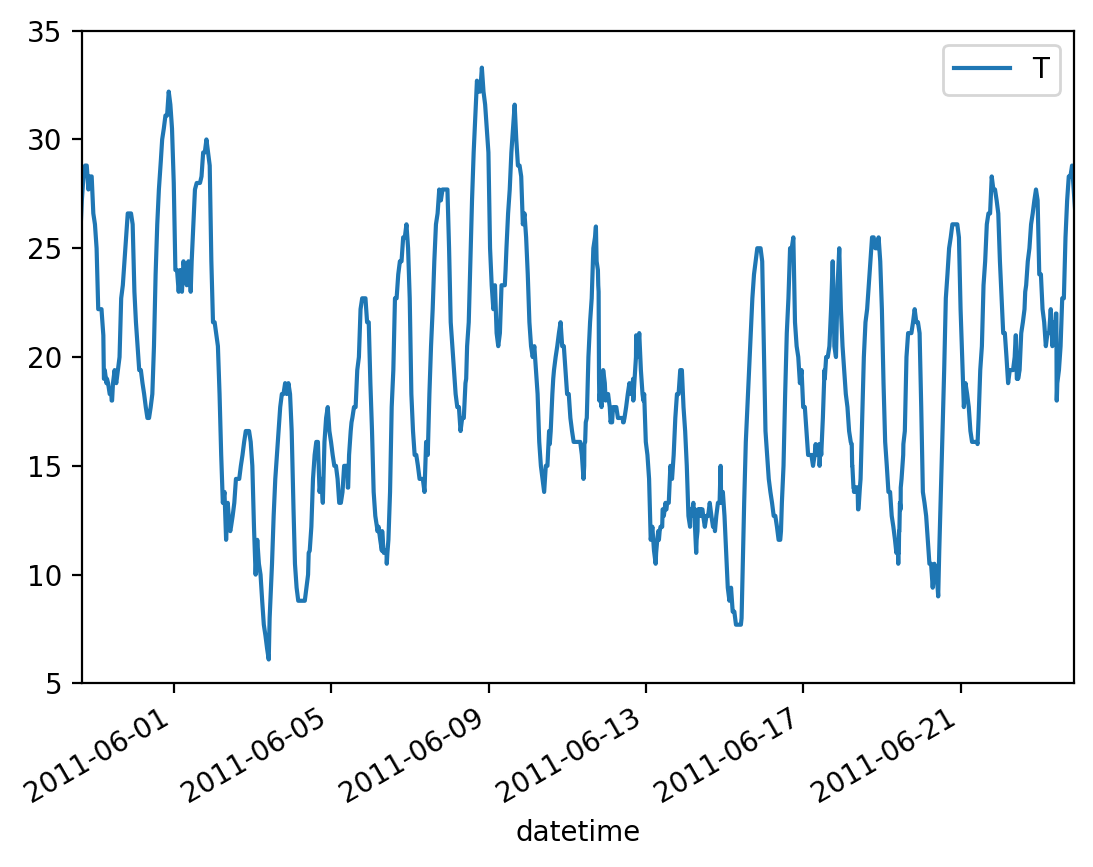

In [6]:
plt.gca().set_ylim(5, 35)
plt.gca().set_xlim(15123.66216414762, 15148.87407928016)
plt.gcf()

However, this makes it difficult to look at compare between different months.  Either we are zoomed in closely enough to see the details but unable to see the broad trends, or be zoomed out enough to see the large variation but have the details all blur into a solid band.

To explore this dataset a more effectively we can build a multi-scale viewer that will allow us to dig into finer grained data

In [7]:
fig, (ax_by_month, ax_by_day, ax_by_hour) = setup_temperature_figure(figsize=(14, 6))
temperature_at = AggregatedTimeTrace(
    d, "ithaca", ax_by_month, ax_by_day, ax_by_hour
)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The top plot shows monthly avearge, standard deviation, and min/max bands for each month in the data set.

By clicking on points in the top (all data aggregated by moth) axes we can add curves to the middle (a month of data agregated by day) axes, and by clicking on data in the middle axes we can add data to the bottom (one day of hourly data) axes.